In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from specim.specfuncs import spec1d

## We have two spectra for B0631. One is coadded 1d spectra, extracted from LRIS data and the other one is extracted from coadded 2d ESI spectra. We'll calculae velocity dispersion using both. However, the LRIS one seems to have better SNR.

## First we'll work with LRIS one and then ESI one.

## LRIS

In [17]:
spec = Veldis('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[635, 3700]) # logwav=True, 


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  6157.39
 Spectrum End:     8608.76
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



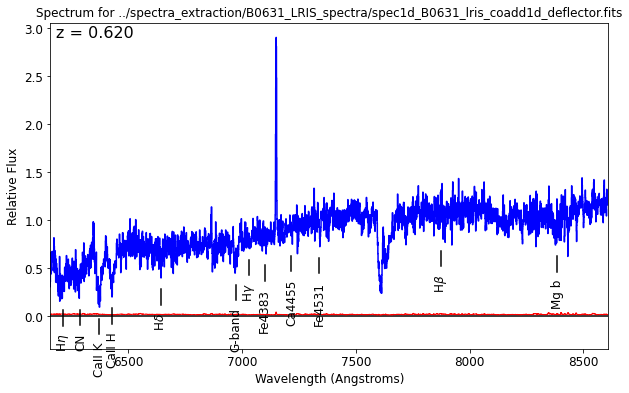

In [54]:
fg = plt.figure(figsize=(10,6))
spec.smooth(1, fig=fg)
spec.mark_lines('abs', z=0.620, usesmooth=True)
#spec.mark_lines('strongem', z=0.620, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 32.790286 km/s


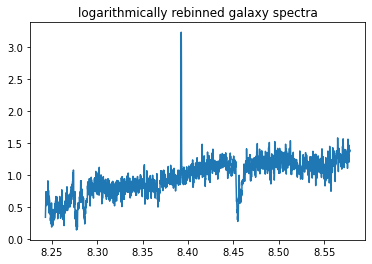

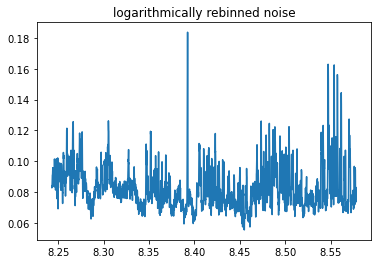

In [19]:
spec.cal_parm(z=0.620, high_z=True, logscale=False, veldis_start=250, noise_scale=0.08)

In [20]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -27734.862676 

sigma_diff : 2.010670


In [55]:
mask_reg = np.log(np.array([(6333, 6356), (6860, 6890), (7135, 7165), (7585, 7700)])/1.62)
print(mask_reg) #(7585, 7735) (6337, 6353),

[[8.27110319 8.27472838]
 [8.35103657 8.35540021]
 [8.39034138 8.39453719]
 [8.45150174 8.46654946]]



degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        17       159
chi2/DOF: 1.111; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        17       157
chi2/DOF: 1.110; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1267

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        17       156
chi2/DOF: 1.107; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:        17       157
chi2/DOF: 1.106; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

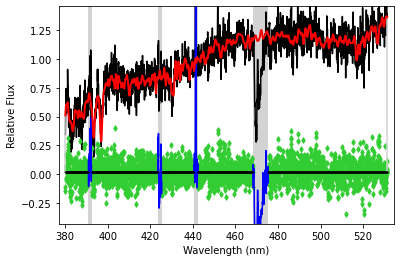

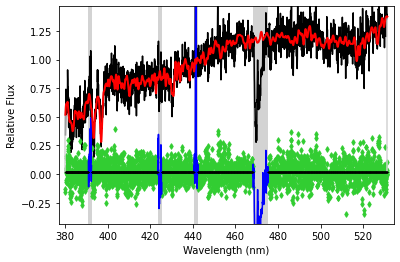

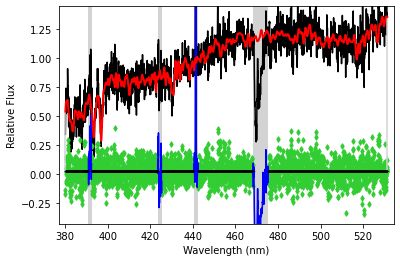

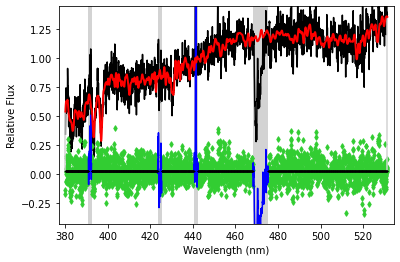

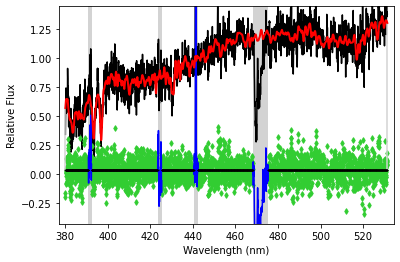

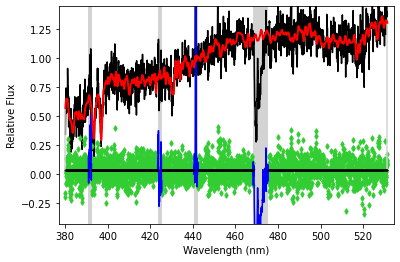

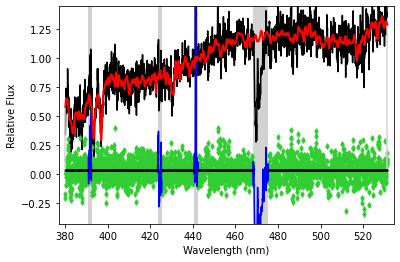

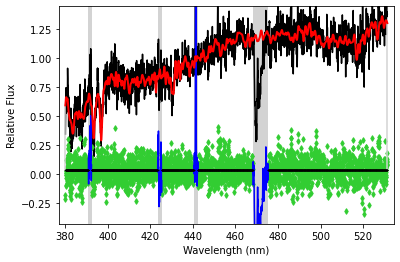

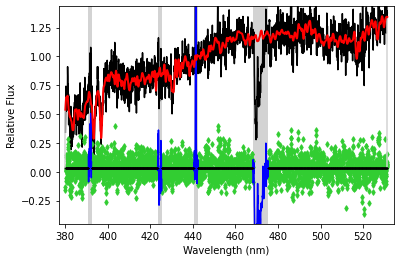

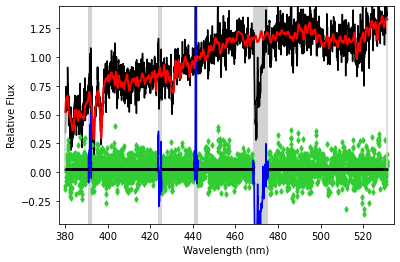

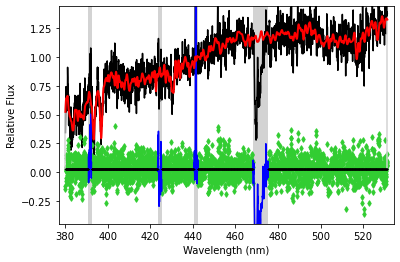

<Figure size 432x288 with 0 Axes>

In [56]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 16], mask_reg=mask_reg, show_weight=True, moments=2)

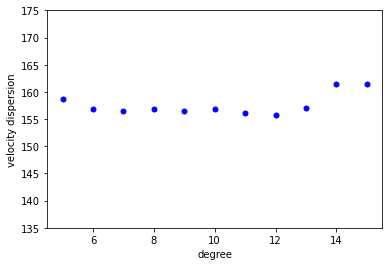

In [57]:
spec.plot_veldis(ylim=[135, 175])

order : 8


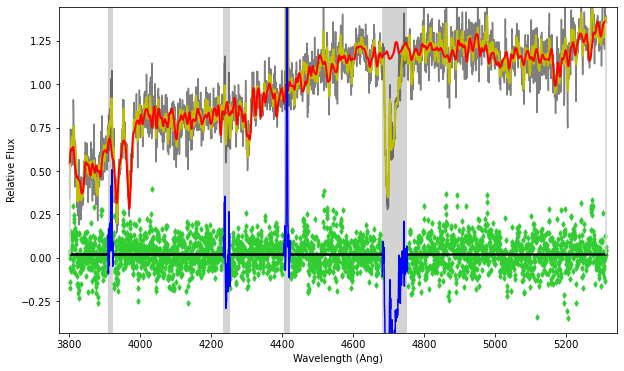

In [58]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=7, fig=fg)
    print('order : %d' %od)
    plt.show()

## Blue side

In [37]:
spec_b = Veldis('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[635, 2170]) # logwav=True, 


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  6157.39
 Spectrum End:     7384.88
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22



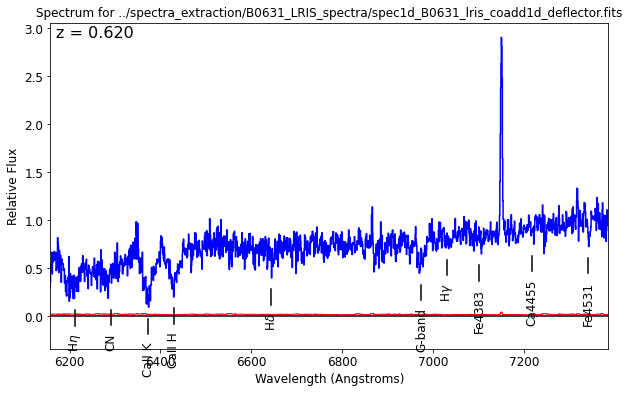

In [38]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(1, fig=fg)
spec_b.mark_lines('abs', z=0.620, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 35.526070 km/s


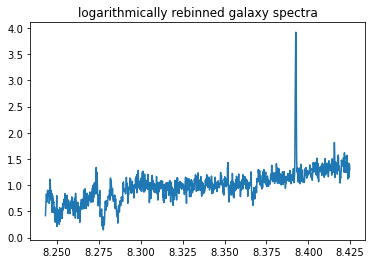

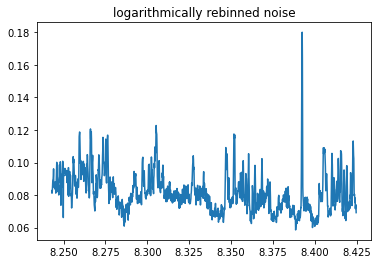

In [43]:
spec_b.cal_parm(z=0.620, high_z=True, logscale=False, veldis_start=250, noise_scale=0.08)

In [44]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -27734.862676 

sigma_diff : 2.010670



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        27       174
chi2/DOF: 1.564; degree = 2; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        26       174
chi2/DOF: 1.561; degree = 3; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        29       174
chi2/DOF: 1.561; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        25       169
chi2/DOF: 1.557; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

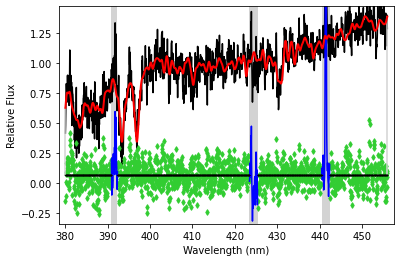

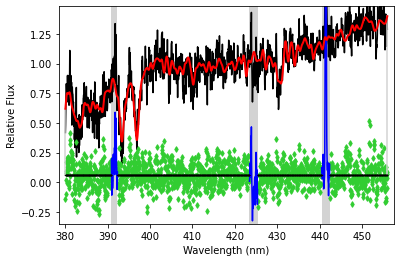

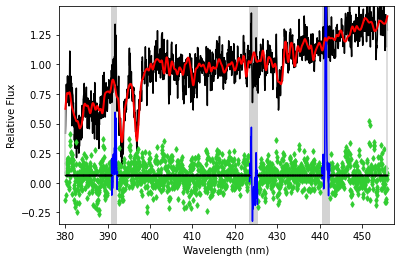

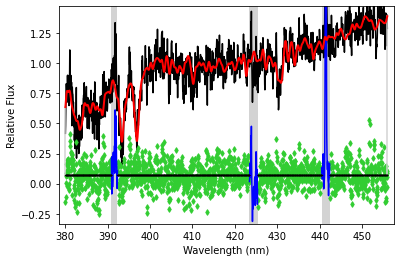

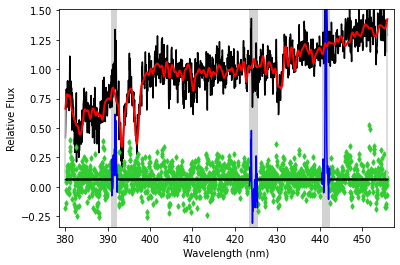

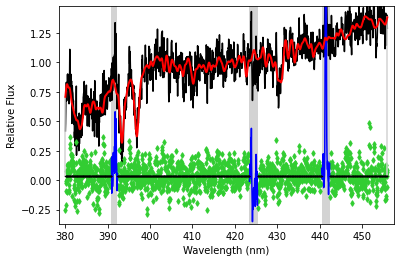

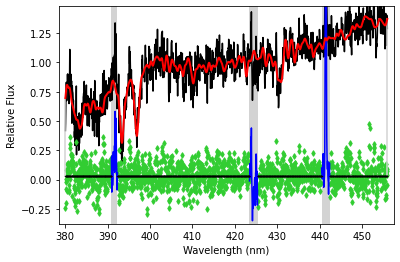

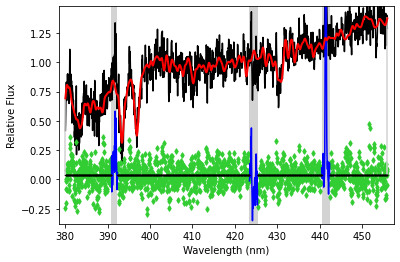

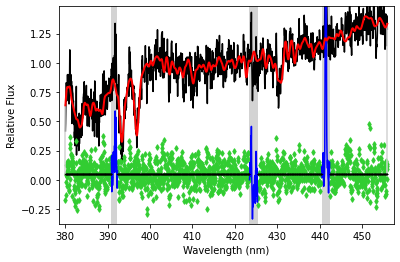

<Figure size 432x288 with 0 Axes>

In [59]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

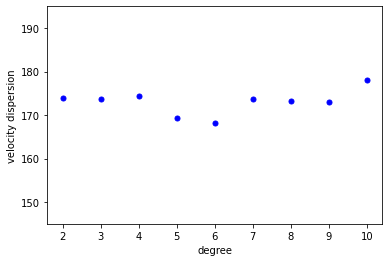

In [60]:
spec_b.plot_veldis(ylim=[145, 195])

order : 8


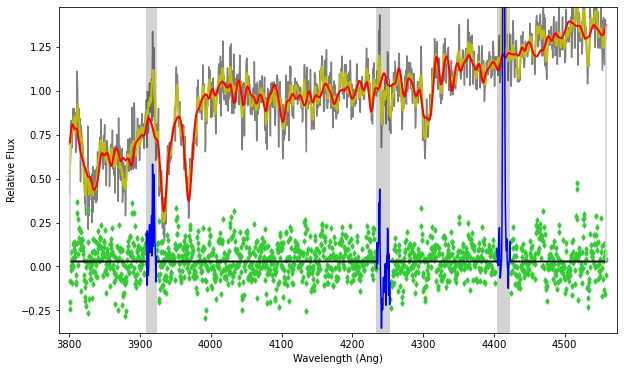

In [61]:
ord_list = np.array([8])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=7, fig=fg)
    print('order : %d' %od)
    plt.show()

## Red side

In [41]:
spec_r = Veldis('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[2165, 3700]) # logwav=True, 


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  7381.68
 Spectrum End:     8608.76
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



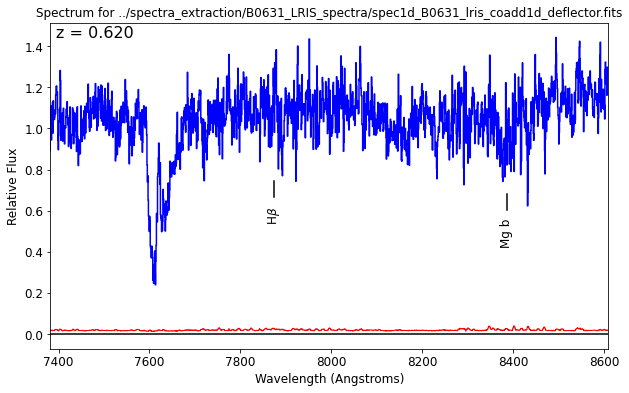

In [42]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(1, fig=fg)
spec_r.mark_lines('abs', z=0.620, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 30.053498 km/s


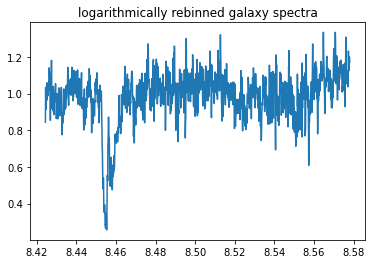

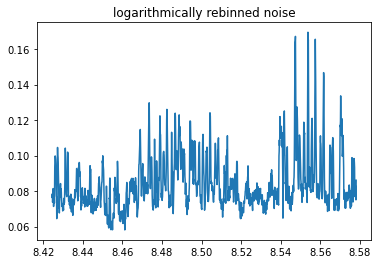

In [62]:
spec_r.cal_parm(z=0.620, high_z=True, logscale=False, veldis_start=250, noise_scale=0.08)

In [63]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -82101.736496 

sigma_diff : 2.010670



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       -14       148
chi2/DOF: 0.7625; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       -14       152
chi2/DOF: 0.7617; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       -14       155
chi2/DOF: 0.7607; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        -4       154
chi2/DOF: 0.7520; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:   

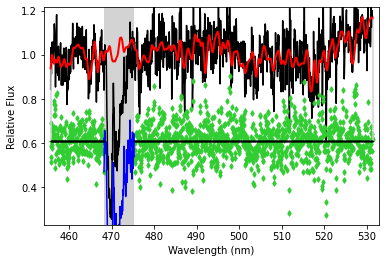

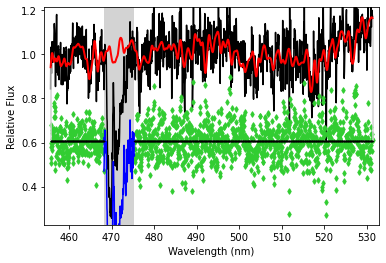

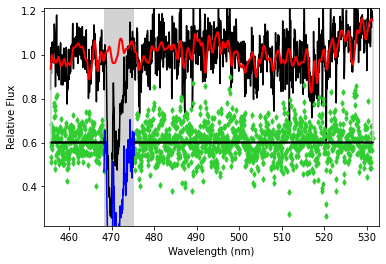

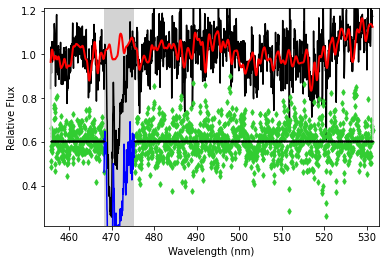

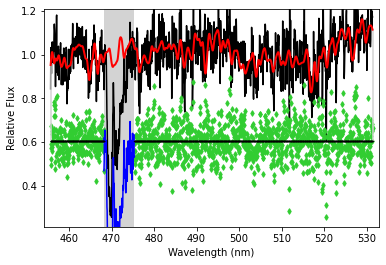

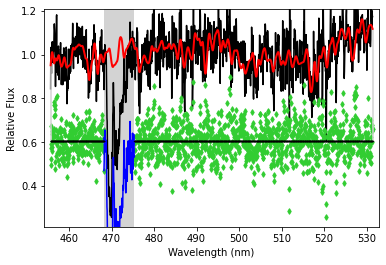

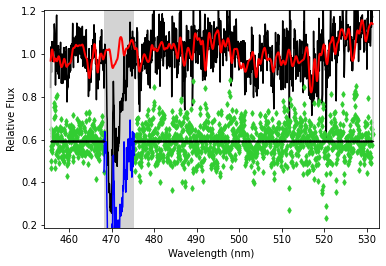

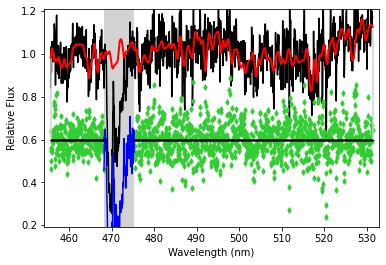

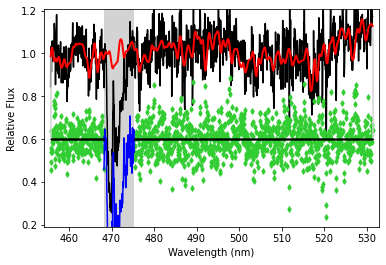

<Figure size 432x288 with 0 Axes>

In [64]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

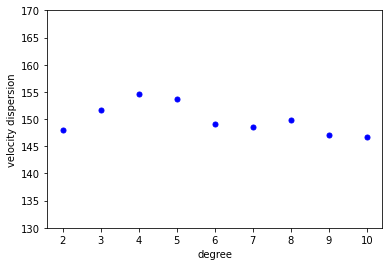

In [66]:
spec_r.plot_veldis(ylim=[130, 170])

# Results

## Systematic uncertainty

### Systematic uncertainty is calculated by changing wavelength range used to fit for velocity dispersion, degree of additive polynomial and template set. There are three choice for wavelength range- full spectrum, blue side half and red side half.

In [67]:
veldis_array = []
discard_veldis = []

In [68]:
## full spectrum

addtive_deg_full = np.arange(5, 16)

for d in addtive_deg_full:
    for i in range(10):
        temp_choice = np.random.choice(temp_spec.shape[1], size=600, replace=False)
        spec.cal_veldis(temp_spec=temp_spec[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec.vel_dis[0])
        else:
            veldis_array.append(spec.vel_dis[0])


degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 12

degree : 

In [69]:
## blue side
addtive_deg_b = np.arange(2, 11)

for d in addtive_deg_b:
    for i in range(11):
        temp_choice = np.random.choice(temp_spec_b.shape[1], size=600, replace=False)
        spec_b.cal_veldis(temp_spec=temp_spec_b[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_b.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_b.vel_dis[0])
        else:
            veldis_array.append(spec_b.vel_dis[0])


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

deg

In [70]:
## red side
addtive_deg_r = np.arange(2, 11)

for d in addtive_deg_r:
    for i in range(11):
        temp_choice = np.random.choice(temp_spec_r.shape[1], size=600, replace=False)
        spec_r.cal_veldis(temp_spec=temp_spec_r[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_r.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_r.vel_dis[0])
        else:
            veldis_array.append(spec_r.vel_dis[0])


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

deg

317


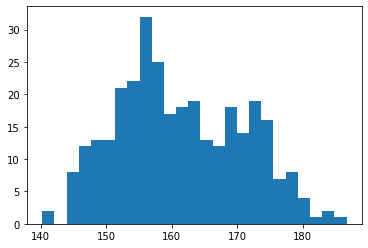

In [71]:
plt.hist(veldis_array, bins=25)
print(len(veldis_array))

In [74]:
np.savetxt('B0631_LRIS_systematic_veldis.txt', np.array(veldis_array), fmt='%f')

## Measured systematic uncertainty

In [72]:
print('systematic uncertainty for population : %d km/s' % int(np.std(veldis_array)))
print('systematic uncertainty for sample : %d km/s' % int(np.std(veldis_array, ddof=1)))

systematic uncertainty for population : 9 km/s
systematic uncertainty for sample : 9 km/s


In [73]:
print('mean velocity dispersion : %d km/s' % int(np.mean(veldis_array)))

mean velocity dispersion : 161 km/s


## The velocity dispersion value that to be reported is measured using all templates and additive polynomial with degree 10. The degree of the polynomial is decided based on the length of the spectrum which in this case around 2450 Ang. 


degree : 10
 Best Fit:       Vel     sigma
 comp.  0:        19       157
chi2/DOF: 1.086; degree = 10; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267


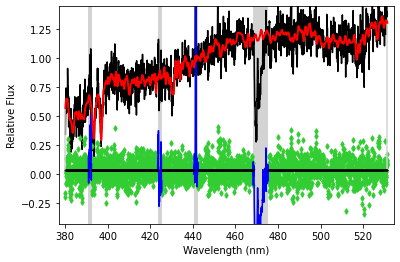

<Figure size 432x288 with 0 Axes>

In [75]:
spec.cal_veldis(temp_spec=temp_spec, degree=[10, 11], mask_reg=mask_reg, show_weight=True, moments=2)

## store best fit data and good pixel values for future use

In [76]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('B0631_LRIS_bestfit_veldis.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

In [77]:
fit_data = np.loadtxt('B0631_LRIS_bestfit_veldis.txt')

6332.859276085376 6356.453790359381
6859.991121750792 6890.069778154632
7134.715348051042 7165.214824029415
7584.554577128609 7700.746232034833


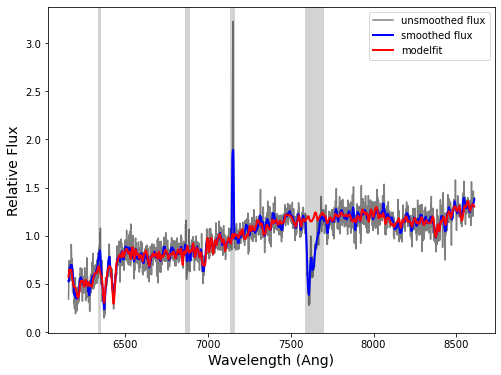

In [78]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)*1.620
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5)
plt.plot(x, gal_smooth, color='b', linewidth=2, label='smoothed flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend()

## Check what is velocity dispersion if the rest wavelength region from 4200-4800 Ang and 5090-5450 Ang are used as Matt suggested.

In [94]:
spec_new = Veldis('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits', 
              informat='fits') # logwav=True, 


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  5649.56
 Spectrum End:     8925.67
 Dispersion (1st pixel):   0.78
 Dispersion (average):      0.80



In [80]:
spec_new.closest_wavelength(np.array([[4200, 4800], [5090, 5450]])*1.620)


Given waverange(assumed) : 

6804.0 7776.000000000001
8245.800000000001 8829.0

Closest waverange to the given ones : 

6804.027976820935 7776.014672026819
8245.552786275164 8828.768334577873


([(6804.027976820935, 7776.014672026819),
  (8245.552786275164, 8828.768334577873)],
 [(1443, 2658), (3245, 3974)])

In [81]:
spec1 = Veldis('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[1440, 2660]) # logwav=True, 


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  6801.63
 Spectrum End:     7776.81
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22



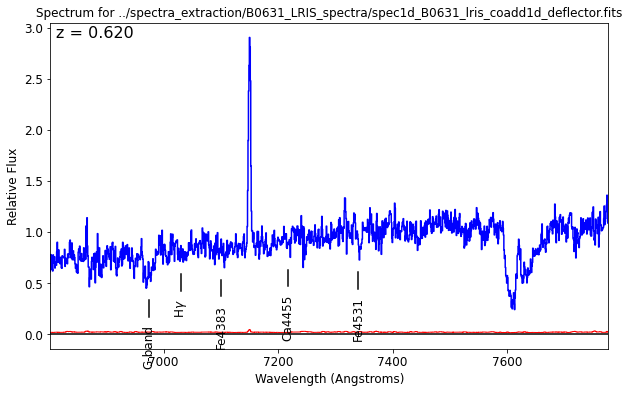

In [83]:
fg = plt.figure(figsize=(10,6))
spec1.smooth(1, fig=fg)
spec1.mark_lines('abs', z=0.620, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 32.951409 km/s


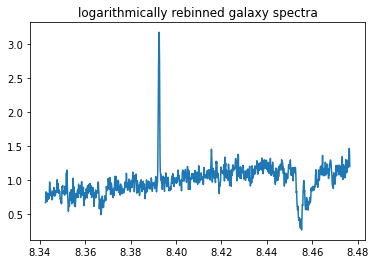

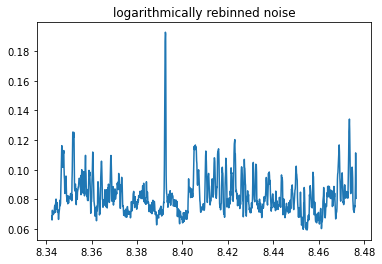

In [95]:
spec1.cal_parm(z=0.620, high_z=True, logscale=False, veldis_start=250, noise_scale=0.08)

In [96]:
temp_spec1 = spec1.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -57567.079781 

sigma_diff : 2.010670



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        45       172
chi2/DOF: 0.8431; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        47       169
chi2/DOF: 0.8424; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        48       169
chi2/DOF: 0.8420; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        48       160
chi2/DOF: 0.8377; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:   

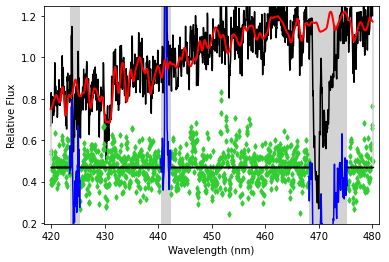

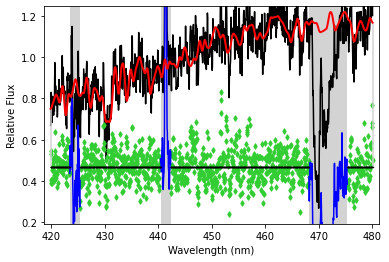

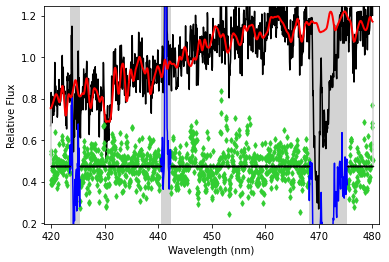

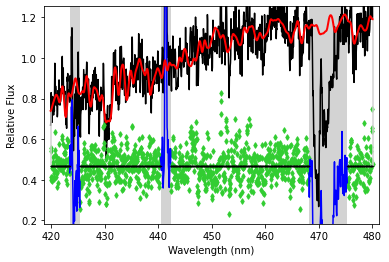

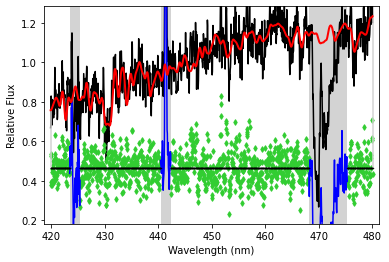

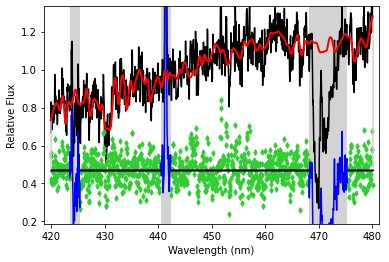

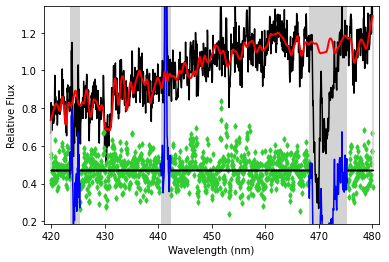

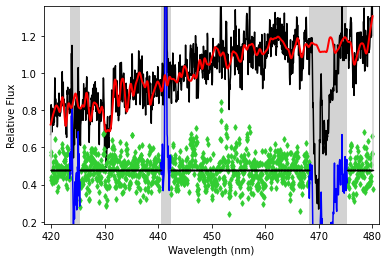

<Figure size 432x288 with 0 Axes>

In [97]:
spec1.cal_veldis(temp_spec=temp_spec1, degree=[2, 10], mask_reg=mask_reg, show_weight=True, moments=2)

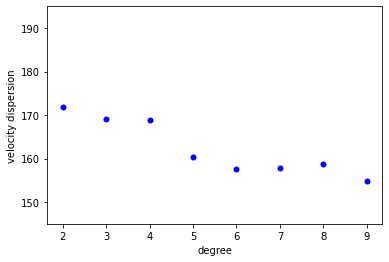

In [100]:
spec1.plot_veldis(ylim=[145, 195])

In [82]:
spec2 = Veldis('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[3244, 3975]) # logwav=True, 


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  8244.75
 Spectrum End:     8828.77
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       8385.12



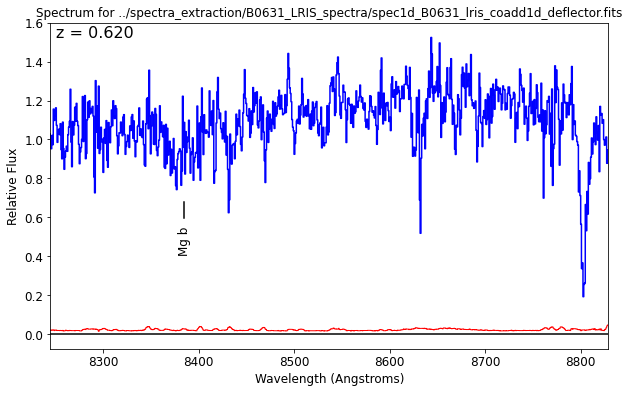

In [84]:
fg = plt.figure(figsize=(10,6))
spec2.smooth(1, fig=fg)
spec2.mark_lines('abs', z=0.620, usesmooth=True)


The wavelength is red shifted.
Velocity scale = 28.106001 km/s


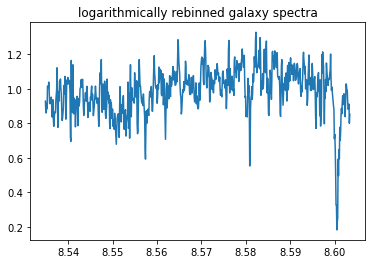

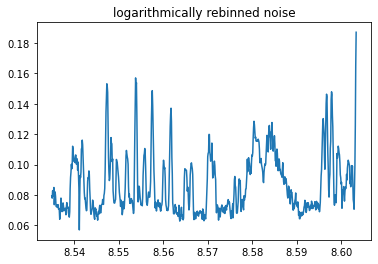

In [101]:
spec2.cal_parm(z=0.620, high_z=True, logscale=False, veldis_start=250, noise_scale=0.08)

In [102]:
temp_spec2 = spec2.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -115251.671419 

sigma_diff : 2.010670



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        85       187
chi2/DOF: 1.060; degree = 2; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 1267
991, 13.743052

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        81       186
chi2/DOF: 1.056; degree = 3; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1267
991, 16.790460

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        82       187
chi2/DOF: 1.056; degree = 4; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 20; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1267
991, 16.056059

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        82       187
chi2/DOF: 1.056; degree = 5; mdegree = 0
method = capfit; Jac calls: 6; Func calls: 20; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1267
991, 15.729018


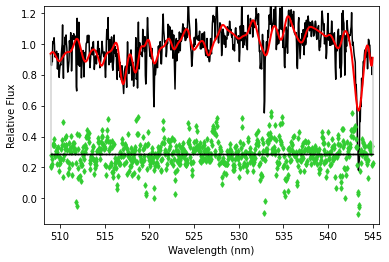

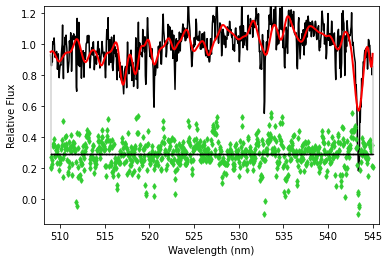

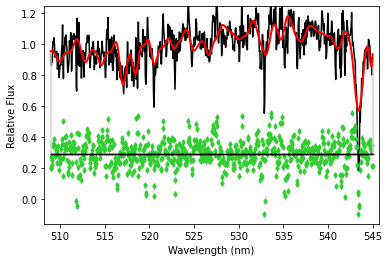

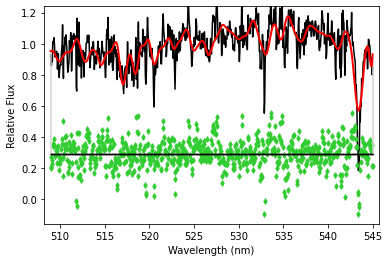

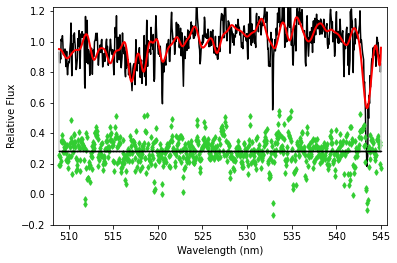

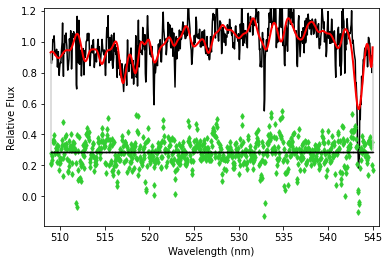

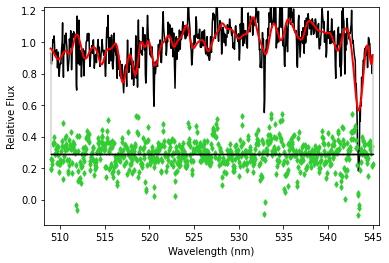

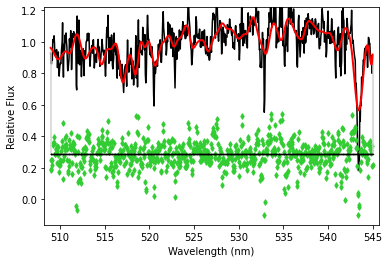

<Figure size 432x288 with 0 Axes>

In [103]:
spec2.cal_veldis(temp_spec=temp_spec2, degree=[2, 10], mask_reg=mask_reg, show_weight=True, moments=2)

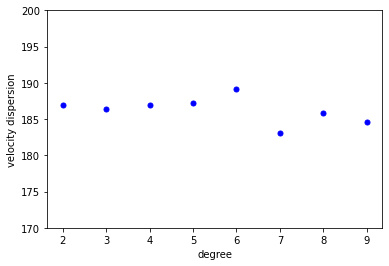

In [104]:
spec2.plot_veldis(ylim=[170, 200])

In [109]:
mask_reg2 = np.log(np.array([[8780, 8830]])/1.620)


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       -35       132
chi2/DOF: 0.8590; degree = 2; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       -33       134
chi2/DOF: 0.8585; degree = 3; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       -38       130
chi2/DOF: 0.8495; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       -37       130
chi2/DOF: 0.8491; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:   

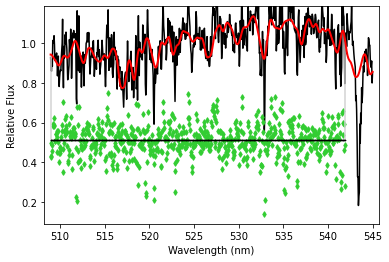

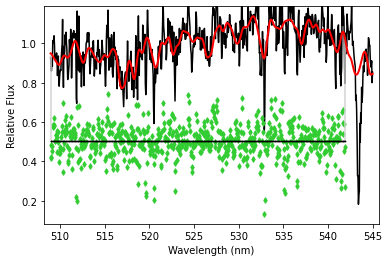

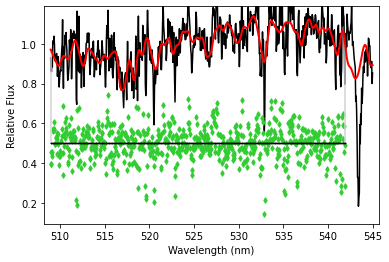

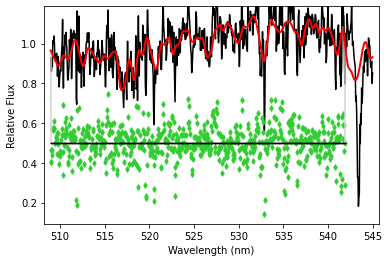

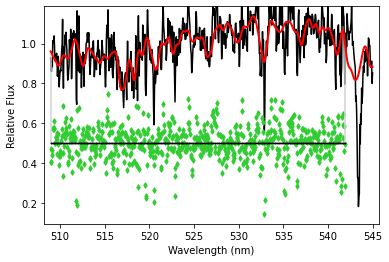

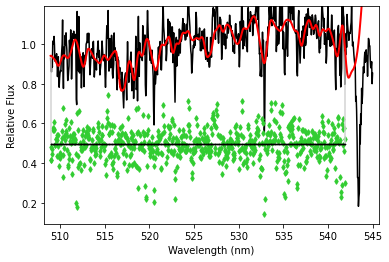

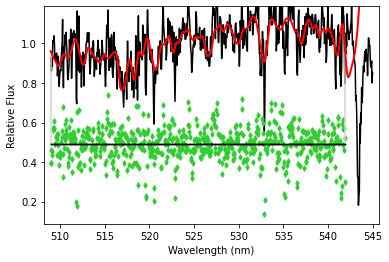

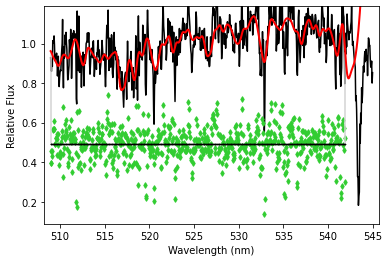

<Figure size 432x288 with 0 Axes>

In [110]:
spec2.cal_veldis(temp_spec=temp_spec2, degree=[2, 10], mask_reg=mask_reg2, show_weight=True, moments=2)

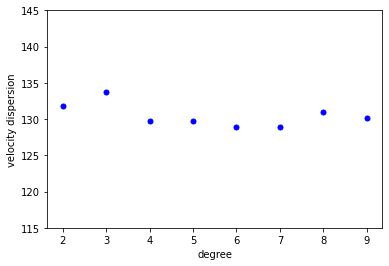

In [111]:
spec2.plot_veldis(ylim=[115, 145])